Ash's Bump Model
================



## Notebook Settings



In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

%run ../notebooks/setup.py
%matplotlib inline
%config InlineBackend.figure_format = 'png'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Python exe
/home/leon/mambaforge/bin/python

## Imports



In [1]:
import sys
sys.path.insert(0, '../')

import torch
import gc
import pandas as pd
from time import perf_counter  

from src.network import Network
from src.plot_utils import plot_con
from src.decode import decode_bump

## Helpers



In [1]:
def convert_seconds(seconds):
    h = seconds // 3600
    m = (seconds % 3600) // 60
    s = seconds % 60
    return h, m, s

## Single trial



### Parameters



In [1]:
REPO_ROOT = "/home/leon/models/NeuroTorch"
conf_name = "conf_ash.yml"
file_name = "ash_output"

We first generate a network:



In [1]:
model = Network(conf_name, file_name, REPO_ROOT, VERBOSE=1, DEVICE='cuda:0', LR_TRAIN=0, N_NEURON=512)

Na tensor([256, 256], device='cuda:0', dtype=torch.int32) Ka tensor([1., 1.], device='cuda:0') csumNa tensor([  0, 256, 512], device='cuda:0')
Jab [8.192, -7.68, 6.144, -3.584]
Ja0 [0.6, 0.4]

We can check the connectivity



In [1]:
Cij = model.Wab_T.cpu().numpy()
print(Cij.shape)

(512, 512)

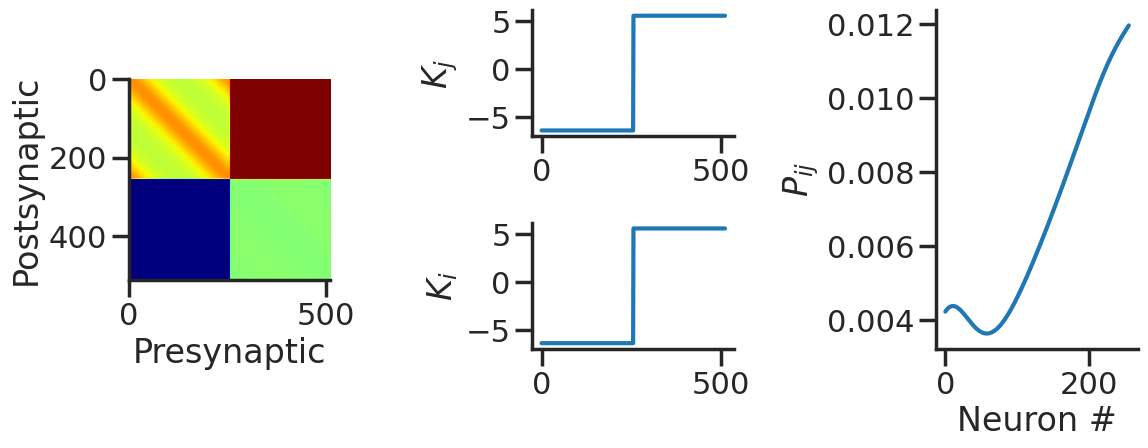

In [1]:
plt.figure(figsize=(12, 5))  # Set the figure size (width, height) in inches

ax1 = plt.subplot2grid((2, 3), (0, 0), rowspan=2)
im = ax1.imshow(Cij, cmap='jet', aspect=1)
ax1.set_xlabel("Presynaptic")
ax1.set_ylabel("Postsynaptic")

# Second column, first row
ax2 = plt.subplot2grid((2, 3), (0, 1))
Kj = np.sum(Cij, axis=0)  # sum over pres
ax2.plot(Kj)
# ax2.set_xticklabels([])
ax2.set_ylabel("$K_j$")

# # Second column, second row
ax3 = plt.subplot2grid((2, 3), (1, 1))
Ki = np.sum(Cij, axis=1)  # sum over pres
ax3.plot(Kj)
ax3.set_ylabel("$K_i$")

ax4 = plt.subplot2grid((2, 3), (0, 2), rowspan=2)
diags = []
for i in range(int(Cij.shape[0] / 2)):
    diags.append(np.trace(Cij, offset=i) / Cij.shape[0])
diags = np.array(diags)
ax4.plot(diags)
ax4.set_xlabel("Neuron #")
ax4.set_ylabel("$P_{ij}$")

plt.tight_layout()
plt.show()

Then we can run the simulation:



In [1]:
rates = model(REC_LAST_ONLY=0).cpu().numpy()[0]
print(rates.shape)

generating ff input
times (s) 0.0 rates (Hz) [0.0, 0.75]
times (s) 0.83 rates (Hz) [0.0, 0.77]
times (s) 1.67 rates (Hz) [0.0, 0.78]
times (s) 2.5 rates (Hz) [0.0, 0.74]
times (s) 3.33 rates (Hz) [0.0, 0.78]
times (s) 4.17 rates (Hz) [0.0, 0.76]
times (s) 5.0 rates (Hz) [0.0, 0.73]
times (s) 5.83 rates (Hz) [0.0, 0.78]
times (s) 6.67 rates (Hz) [0.0, 0.75]
times (s) 7.5 rates (Hz) [0.0, 0.77]
times (s) 8.33 rates (Hz) [0.0, 0.77]
Elapsed (with compilation) = 0.8448861725628376s
(11, 512)

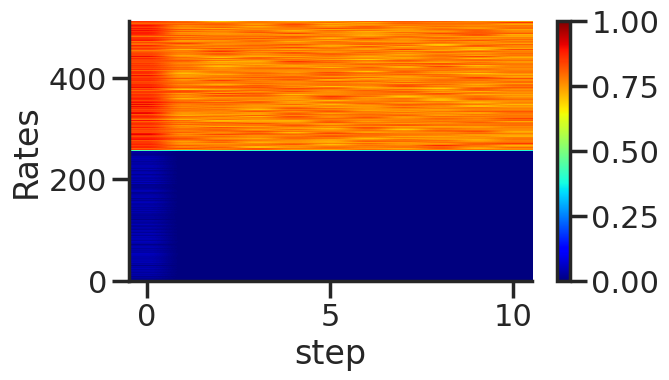

In [1]:
r_max = 1
plt.imshow(rates.T, aspect='auto', cmap='jet', vmin=0, vmax=r_max, origin='lower')
plt.xlabel('step')
plt.ylabel('Rates')
plt.colorbar()
plt.show()